# 색공간 바꾸기 및 색 추적(HSV)
____

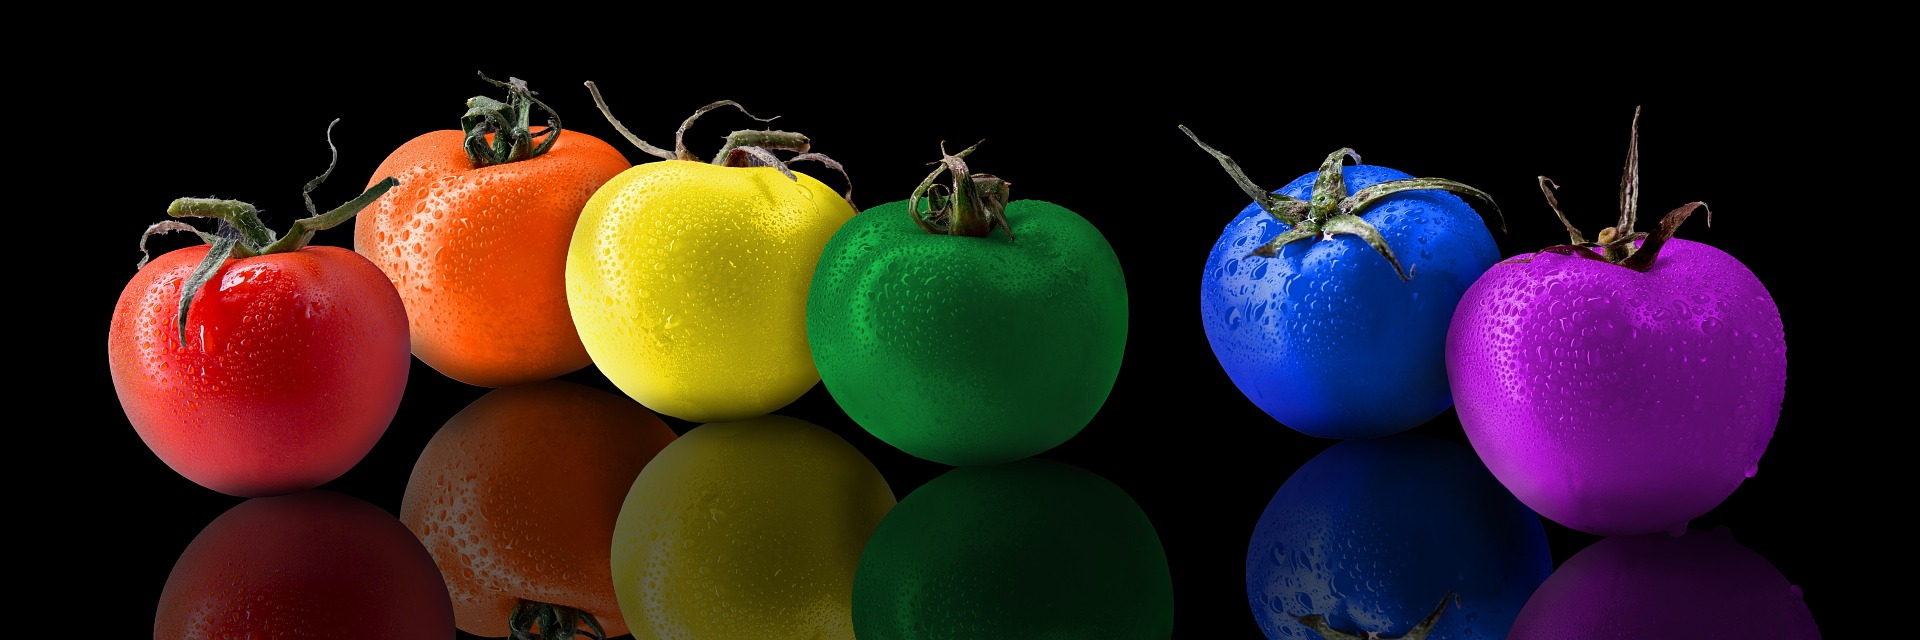

- 영상이나 이미지를 색상을 검출하기 위해 사용합니다. 채널을 Hue, Saturation, Value 로 분리하여 변환할 수 있습니다.

    - 색상 (Hue) : 색의 질입니다. 빨강, 노랑, 파랑이라고 하는 표현으로 나타내는 성질입니다.
    - 채도 (Saturation) : 색의 선명도입니다. 아무것도 섞지 않아 맑고 깨끗하며 원색에 가까운 것을 채도가 높다고 표현합니다.
    - 명도 (Value) : 색의 밝기입니다. 명도가 높을수록 백색에, 명도가 낮을수록 흑색에 가까워집니다.

# Main Code
____

In [2]:
import numpy as np
import cv2

def hsv():
    blue = np.uint8([[[255, 0, 0]]])
    green = np.uint8([[[0, 255, 0]]])
    red = np.uint8([[[0, 0, 255]]])
    
    hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
    hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
    hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
    
    print('HSV for BLUE: ',hsv_blue)
    print('HSV for GREEN: ', hsv_green)
    print('HSV for RED: ',hsv_red )
hsv()

HSV for BLUE:  [[[120 255 255]]]
HSV for GREEN:  [[[ 60 255 255]]]
HSV for RED:  [[[  0 255 255]]]


> blue = np.uint8([[[255, 0, 0]]])

Blue 픽셀 1개에 해당하는 numpy array를 생성합니다. Green,Red에 대해서도 동일한 방법으로 생성합니다.

> hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

BGR 색공간으로 생성한 Blue를 HSV 값으로 전환한 것을 hsv_blue에 담습니다. Green,Red에 대해서도 동일한 방법으로 전환합니다.

위 코드를 실행한 결과를 보면 Blue(255, 0, 0), Green(0, 255, 0), Red(0, 0, 255)의 HSV 값은 아래와 같이 출력이 됩니다.
- HSV for BLUE:  [[[120 255 255]]]
- HSV for GREEN:  [[[ 60 255 255]]]
- HSV for RED:  [[[  0 255 255]]]

위에서 설명한 HSV 윈기동에 매핑하여 생각해보면, Red가 H값이 0으로 Hue의 기준점이 되는것을 알 수 있습니다.
Saturation(채도)와 Value(진하기) 모두 255이므로 100%입니다.



# 웹캠을 이용한 HSV
____

이를 응용하여 웹갬으로 전송되는 영상을 아래와 같은 기능을 수행하는 프로그램을 만들어 봅시다.

- 웹캠으로 전송되는 비디오 영상을 분석하여 Blue, Green, Red 색상을 가진 물체만 따로 보이도록 함
- 프로그램은 총 4개의 화면으로 구성
    - 오리지널 비디오 화면
    - Blue 색상을 가진 물체만 보이는 화면
    - Green 색상을 가진 물체만 보이는 화면
    - Red 색상을 가진 물체만 보이는 화면

* Tip
    - (110, 100, 100) ~ (130, 255, 255) 범위는 Blue로 판단
    - (50, 100, 100) ~ (70, 255, 255) 범위는 Green으로 판단
    - (-10, 100, 100) ~ (10, 255, 255) 범위는 Red로 판단
    
위 범위를 좁히면 B, G, R을 보다 까다롭게 추출하는 것이고 범위를 넓히면 그 반대입니다.

# Main Code(1)
____

In [4]:
import numpy as np
import cv2

def tracking():
    try:
        print('카메라를 구동합니다.')
        cap = cv2.VideoCapture(0)
    except:
        print('카메라 구동 실패')
        return
    
    while True:
        ret, frame = cap.read()
        
        #BGR을 HSV모드로 전환
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # HSV에서 BGR로 가정할 범위를 정의함
        lower_blue = np.array([100, 50, 50])
        upper_blue = np.array([140, 255, 255])
        
        lower_green = np.array([40, 50, 50])
        upper_green = np.array([80, 255, 255])
        
        lower_red = np.array([-20, 50, 50])
        upper_red = np.array([20, 255, 255])
        
        # HSV 이미지에서 청색만, 또는 초록색만 또는 빨간색만 추출하기 위한 임계값
        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_green = cv2.inRange(hsv, lower_green, upper_green)
        mask_red = cv2.inRange(hsv, lower_red, upper_red)
        
        #mask와 원본 이미지를 비트 연산함
        res1 = cv2.bitwise_and(frame, frame, mask = mask_blue)
        res2 = cv2.bitwise_and(frame, frame, mask = mask_green)
        res3 = cv2.bitwise_and(frame, frame, mask = mask_red)
        
        cv2.imshow('original', frame)
        cv2.imshow('BLUE', res1)
        cv2.imshow('GREEN', res2)
        cv2.imshow('RED', res3)
        
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
    cv2.destroyAllWindows()
    
tracking()

카메라를 구동합니다.


# Detailed Code(1)
____

> hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

웹캠에서 전송되는 비디오 프레임을 HSV 색공간으로 변경합니다.

> mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

cv2.inRange() 함수는 소스인 hsv의 모든값을 lower_blue, upper_blue로 지정한 범위에 있는지 체크한 뒤, 범위에 해당하는 부분은 그 값 그대로, 나머지 부분은 0으로 채워서 결과값을 반환합니다.

즉 위 코드는 hsv에서 lower_blue와 upper_blue 사이에 해당하는 값은 그대로 두고, 나머지 부분은 0으로 채워 mask_blue에 전달합니다. 따라서 우리가 정의한 Blue 범위 이외는 모두 검정색으로 처리된 후 값을 넘겨주게 됩니다.

